In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTENC, ADASYN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
train = pd.read_csv('spy_train_set.csv', index_col='period')
test = pd.read_csv('googl_test_set.csv', index_col='period')
train

,y,vpoc_1,total_volume_1,vpoc_tpoc_dist_1,vpoc_close_dist_1,tpoc_close_dist_1,vpoc_price_high_dist_1,vpoc_price_low_dist_1,tpoc_price_high_dist_1,tpoc_price_low_dist_1,...,price_kurt_1_2,vol_price_std_1_2,vol_price_skew_1_2,vol_price_kurt_1_2,trapped_longs_1_2,trapped_shorts_1_2,trapped_shorts_at_extremes_1_2,trapped_longs_at_extremes_1_2,rvol,rvpoc
period,,,,,,,,,,,,,,,,,,,,,
2024-03-26 09:35:00,1.0,6333.0,108210.0,0.177,0.191,0.014,-0.125,0.292,-0.302,0.115,...,-1.380,13343.505,7.165,53.192,0.0,1.0,1.0,0.0,0.390295,0.061713
2024-03-26 09:40:00,1.0,8650.0,135346.0,0.000,-0.321,-0.321,-0.327,0.000,-0.327,0.000,...,1.374,1427.646,1.262,1.483,1.0,0.0,0.0,0.0,1.250772,1.365861
2024-03-26 09:45:00,0.0,8100.0,61379.0,0.032,-0.054,-0.086,-0.123,0.065,-0.155,0.033,...,-1.013,1778.430,1.534,2.873,0.0,1.0,1.0,0.0,0.453497,0.936416
2024-03-26 09:50:00,1.0,4300.0,41548.0,0.261,0.251,-0.010,-0.020,0.321,-0.281,0.060,...,0.779,1330.183,3.274,14.367,0.0,1.0,1.0,0.0,0.676909,0.530864
2024-03-26 09:55:00,1.0,4993.0,46192.0,0.110,0.000,-0.110,-0.021,0.306,-0.131,0.196,...,-0.571,764.350,2.532,8.431,1.0,0.0,0.0,1.0,1.111774,1.161163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-08 15:30:00,0.0,8130.0,91348.0,0.118,-0.071,-0.189,-0.099,0.349,-0.217,0.231,...,1.004,812.646,2.292,7.265,0.0,1.0,0.0,0.0,2.339437,1.847727
2024-04-08 15:35:00,0.0,3700.0,80999.0,-0.261,0.093,0.354,-0.429,0.132,-0.168,0.393,...,-1.054,1517.693,2.080,5.514,0.0,1.0,0.0,0.0,0.886708,0.455105
2024-04-08 15:40:00,1.0,26453.0,105675.0,-0.325,0.102,0.427,-0.415,0.158,-0.090,0.483,...,-1.407,964.509,0.699,-0.650,1.0,0.0,0.0,0.0,1.304646,7.149459


In [4]:
X = train.drop(columns=['y'])
y = train.loc[:,'y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,stratify=y, random_state=0)
# X_test = test.drop(columns=['y'])
# y_test = test.loc[:,'y']

In [5]:
X_train.shape, X_test.shape

((420, 42), (280, 42))

In [5]:
cat_features = ['trapped_longs_1', 'trapped_shorts_1','trapped_shorts_at_extremes_1',
                'trapped_longs_at_extremes_1', 'y_2','trapped_longs_1_2',
                'trapped_shorts_1_2', 'trapped_shorts_at_extremes_1_2',
                'trapped_longs_at_extremes_1_2']
X_res, y_res = SMOTENC(categorical_features=cat_features, sampling_strategy = 'not minority', random_state=1).fit_resample(X_train, y_train)
print(X_res.shape)

X_res, y_res = SMOTENC(categorical_features=cat_features, sampling_strategy = 'not minority', random_state=1).fit_resample(X_res, y_res)
print(X_res.shape)

(420, 42)
(420, 42)


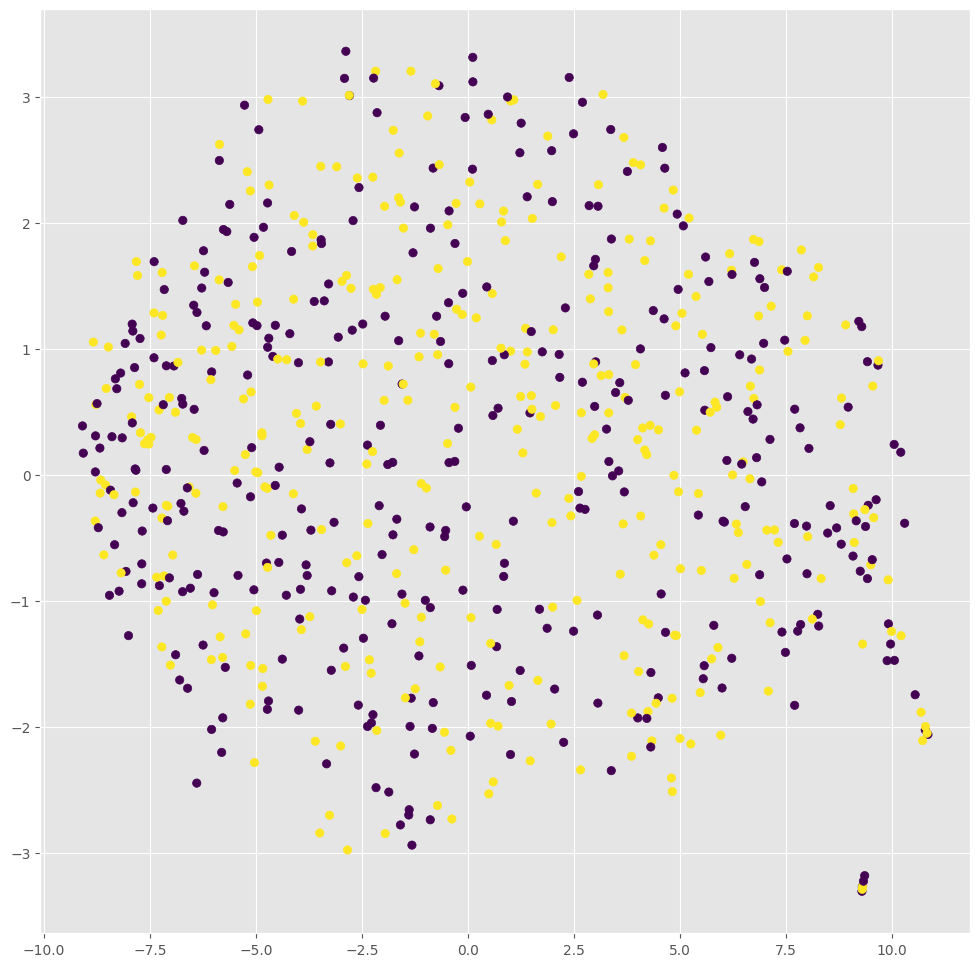

In [6]:
cont_features = train.columns[~(train.columns.isin(cat_features + ['y']))]
tsne = TSNE(n_components=2,perplexity=200,n_iter=4000)
train_embeddings = tsne.fit_transform(train[cont_features].values)
plt.scatter(train_embeddings[:,0],train_embeddings[:,1],c=train.y.values)

In [7]:
pca = PCA(30).fit(X)
px.line(x=range(0,len(pca.explained_variance_)),y= pca.explained_variance_)

In [8]:
pcs = pca.fit_transform(StandardScaler().fit_transform(X))
pc1 = pcs[:,0]
pc2 = pcs[:,1]
px.scatter(x=pc1,y=pc2, color=y)

In [9]:
clf = make_pipeline(StandardScaler(), PCA(2), xgb.XGBClassifier(learning_rate = 0.001,colsample_bytree=0.1,max_depth=3,n_estimators=1555))
clf.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.1, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.001, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=3,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=1555,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [11]:
def tune_threshold(y_probs, threshold):
    
    """ Predicts target with varing the threshold"""
    y_pred_with_threshold = []

    for prob in y_probs[:,1]:
            if prob > threshold:
                y_pred_with_threshold.append(1)
            else:
                y_pred_with_threshold.append(0)
    return y_pred_with_threshold

c = 0.6
y_probs = clf.predict_proba(X_train)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_train, y_pred)}')
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))  
print('\n\n\nTest data')

y_probs = clf.predict_proba(X_test)
y_pred = tune_threshold(y_probs, threshold=c)
print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  

AUC: 0.5554245283018867
              precision    recall  f1-score   support

         0.0       0.53      0.99      0.69       212
         1.0       0.90      0.12      0.22       208

    accuracy                           0.56       420
   macro avg       0.72      0.56      0.46       420
weighted avg       0.71      0.56      0.46       420

[[209   3]
 [182  26]]



Test data
AUC: 0.4790295423235879
              precision    recall  f1-score   support

         0.0       0.49      0.91      0.64       141
         1.0       0.33      0.04      0.08       139

    accuracy                           0.48       280
   macro avg       0.41      0.48      0.36       280
weighted avg       0.41      0.48      0.36       280

[[129  12]
 [133   6]]


In [13]:
# Initial model
xgb0 = xgb.XGBClassifier(learning_rate = 0.001, n_estimators = 1000, n_jobs = -1)
xgbtrain = xgb.DMatrix(X_train.values, y_train.values)

#Cross validaion
cvresult = xgb.cv(xgb0.get_params(), xgbtrain, num_boost_round=xgb0.get_params()['n_estimators'],
                  nfold=3,metrics='auc', early_stopping_rounds=5000, verbose_eval=1)
cvresult
#xgb0.set_params(n_estimators = cvresult.shape[0])
# xgb = XGBClassifier(**param)
# print(xgb)
# xgb.fit(X_train,y_train)

[0]	train-auc:0.89345+0.01900	test-auc:0.52043+0.08181
[1]	train-auc:0.89688+0.01923	test-auc:0.52733+0.08616
[2]	train-auc:0.89575+0.01968	test-auc:0.53026+0.08707
[3]	train-auc:0.89525+0.02028	test-auc:0.52968+0.08659
[4]	train-auc:0.89793+0.01847	test-auc:0.52870+0.08468
[5]	train-auc:0.89803+0.01811	test-auc:0.53135+0.08297
[6]	train-auc:0.89763+0.01860	test-auc:0.53074+0.08582


[7]	train-auc:0.89945+0.01703	test-auc:0.53567+0.08125
[8]	train-auc:0.89985+0.01707	test-auc:0.53632+0.08080
[9]	train-auc:0.89928+0.01746	test-auc:0.53680+0.08045
[10]	train-auc:0.89980+0.01716	test-auc:0.53611+0.08075


c:\Users\zeyad\Desktop\Intraday\venv\lib\site-packages\xgboost\core.py:160: UserWarning:

[10:59:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "enable_categorical", "missing", "n_estimators" } are not used.




[11]	train-auc:0.89982+0.01760	test-auc:0.53567+0.08007
[12]	train-auc:0.89980+0.01738	test-auc:0.53554+0.08004
[13]	train-auc:0.89997+0.01710	test-auc:0.53397+0.07943
[14]	train-auc:0.90042+0.01706	test-auc:0.53479+0.07977
[15]	train-auc:0.90014+0.01697	test-auc:0.53564+0.08063
[16]	train-auc:0.90125+0.01642	test-auc:0.53322+0.08116
[17]	train-auc:0.90123+0.01621	test-auc:0.53417+0.08159
[18]	train-auc:0.90133+0.01624	test-auc:0.53349+0.08147
[19]	train-auc:0.90128+0.01655	test-auc:0.53387+0.08163
[20]	train-auc:0.90145+0.01644	test-auc:0.53383+0.08173
[21]	train-auc:0.90150+0.01617	test-auc:0.53292+0.08084
[22]	train-auc:0.90140+0.01599	test-auc:0.53278+0.08095
[23]	train-auc:0.90144+0.01630	test-auc:0.53315+0.08129
[24]	train-auc:0.90154+0.01618	test-auc:0.53285+0.08109
[25]	train-auc:0.90177+0.01651	test-auc:0.53370+0.07860
[26]	train-auc:0.90184+0.01645	test-auc:0.53207+0.08046
[27]	train-auc:0.90175+0.01660	test-auc:0.53343+0.08145
[28]	train-auc:0.90185+0.01640	test-auc:0.53445+

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.893450,0.019004,0.520428,0.081807
1,0.896878,0.019225,0.527334,0.086161
2,0.895747,0.019680,0.530260,0.087068
3,0.895253,0.020284,0.529682,0.086591
4,0.897932,0.018466,0.528695,0.084681
...,...,...,...,...
995,0.999354,0.000400,0.522302,0.068378
996,0.999337,0.000397,0.522166,0.068277
997,0.999354,0.000400,0.522030,0.068327
998,0.999354,0.000400,0.522098,0.068089


In [14]:
# setup parameters for xgboost
param = {}
param['booster'] = 'gbtree'
param['objective'] = 'binary:logistic'
param["eval_metric"] = "auc"
param['eta'] = 0.3
param['learning_rate'] = 0.001
param['n_estimators'] = int(cvresult.shape[0])
param['early_stopping_rounds'] = False
param['gamma'] = 0
param['max_depth'] = 3
param['min_child_weight']=4
param['max_delta_step'] = 0
param['subsample']= 0.6
param['colsample_bytree']=0.5
param['seed'] = 0
param['base_score'] = 0.5

xgb1 = xgb0.set_params(**param)
xgb1 = xgb1.fit(X_train, y_train)

# ############
# ###############
# #GridSearch params
# ###################
params = {
    'max_depth': [1,2,3,5],
    'subsample':[0.1,0.3,0.5,0.7,0.9],
    'colsample_bytree':[0.1,0.3,0.5,0.7,0.9],
    'min_child_weight':[1,2,4,6,10]
}

# Grid search
gridsearch = GridSearchCV(estimator = xgb1, param_grid = params,
                          cv = StratifiedKFold(n_splits = 3), scoring='precision', verbose=3, n_jobs = -1).fit(X_train, y_train)
xgb1 = xgb1.set_params(
    max_depth = gridsearch.best_params_['max_depth'],
    colsample_bytree= gridsearch.best_params_['colsample_bytree'],
    subsample= gridsearch.best_params_['subsample'],
    min_child_weight = gridsearch.best_params_['min_child_weight']
 )
xgb1


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=False,
              enable_categorical=False, eta=0.3, eval_metric='auc',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
              max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, num_parallel_tree=None, ...)

In [15]:
# def learning_curve(model, eval_metric, X_train, y_train, X_test, y_test):
    
#     # Train  model
#     model.fit(X_train, y_train, eval_metric = eval_metric, eval_set = [(X_train, y_train), (X_test, y_test)])
#     results = model.evals_result()
    
#     # plot learning curve
#     plt.plot(results['validation_0']['error'], label = 'Train', color = 'c')
#     plt.plot(results['validation_1']['error'], label = 'Test', color = 'r')
#     plt.xlabel('n_estimators')
#     plt.ylabel('logloss')
#     plt.legend()
#     plt.show()

# learning_curve(xgb1, 'error', X_train, y_train, X_test, y_test)

In [16]:
c=0.5
y_probs = xgb1.predict_proba(X_train)
y_pred = tune_threshold(y_probs, c)

print(f'AUC: {roc_auc_score(y_train, y_pred)}')
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))  

AUC: 0.816627358490566
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       212
         1.0       0.82      0.81      0.81       208

    accuracy                           0.82       420
   macro avg       0.82      0.82      0.82       420
weighted avg       0.82      0.82      0.82       420

[[174  38]
 [ 39 169]]


In [17]:
y_probs = xgb1.predict_proba(X_test)
y_pred = tune_threshold(y_probs, c)

print(f'AUC: {roc_auc_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))  

AUC: 0.5217102913413949
              precision    recall  f1-score   support

         0.0       0.53      0.48      0.50       141
         1.0       0.52      0.56      0.54       139

    accuracy                           0.52       280
   macro avg       0.52      0.52      0.52       280
weighted avg       0.52      0.52      0.52       280

[[68 73]
 [61 78]]
